In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering,SpectralClustering
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial.distance import euclidean

In [2]:
# 读取标签文件
labels = np.loadtxt(r'C:\Users\LENOVO\Desktop\ML-5\label.dat')

In [3]:
# 读取特征数据文件
data = np.loadtxt(r'C:\Users\LENOVO\Desktop\ML-5\data.dat', usecols=(0, 1, 2))

### 数据集：⽣成 2000 个样例，每个样例的前 3 列表示特征，第 4 列表示标签

### 基本要求(3’)：绘制聚类前后样本分布情况
#### (1) 实现 single-linkage 层次聚类算法；
#### (2) 实现 complete-linkage 层次聚类算法。

### 中级要求(2’)：实现 average-linkage 层次聚类算法，绘制样本分布图。

### 提⾼要求(1’)：对⽐上述三种算法，给出结论。

### 拓展要求：通过变换聚类簇的个数，测试上述三种算法的性能，并给出分析。

### 基本要求

In [4]:
def plot_clusters(X, labels, title):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels, cmap='viridis', s=10, alpha=0.5)
    
    ax.set_title(title)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')

    plt.show()

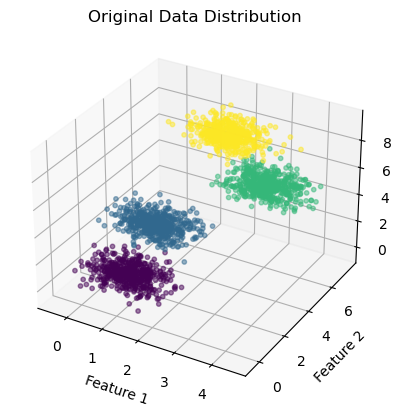

In [5]:
# 绘制原始数据分布
# plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=10, alpha=0.5)
# plt.title("Original Data Distribution")
# plt.show()

plot_clusters(data,labels,"Original Data Distribution")

最短距离（single linkage）

将两个簇的最短距离定义为样本之间的最短距离，即从两个簇的所有点之间的距离中找到那个最短的

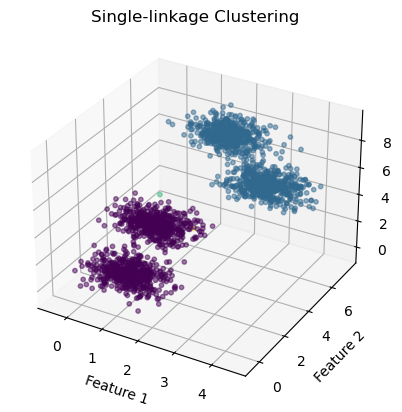

In [6]:
# Single-linkage 层次聚类算法
single_linkage = AgglomerativeClustering(n_clusters=len(np.unique(labels)), linkage='single')
single_labels = single_linkage.fit_predict(data)
plot_clusters(data, single_labels, "Single-linkage Clustering")

In [5]:
# 计算欧氏距离
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

In [11]:
def single_linkage_clustering(data, n_clusters):
    # 初始化每个数据点为一个簇
    clusters = np.arange(len(data))
    
    while len(np.unique(clusters)) > n_clusters:
        min_distance = float('inf')
        merge_clusters = (0, 0)

        # 寻找最小距离的两个簇
        for i in range(len(data)):
            for j in range(i+1, len(data)):
                distance = np.linalg.norm(data[i] - data[j])
                if distance < min_distance:
                    min_distance = distance
                    merge_clusters = (i, j)

        # 合并最小距离的两个簇
        clusters[clusters == merge_clusters[1]] = merge_clusters[0]

    return clusters

In [12]:
# 进行 Single-linkage 聚类
n_clusters = 3
result = single_linkage_clustering(data,n_clusters)

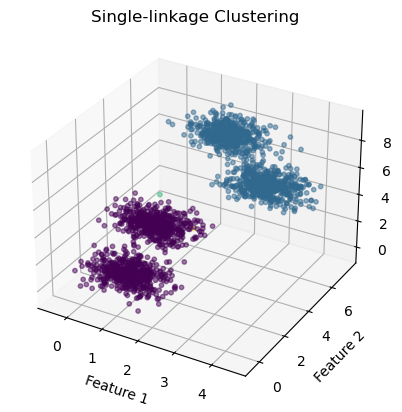

In [14]:
plot_clusters(data, result, "Single-linkage Clustering")

最长距离（complete linkage）

与最短距离相反，以样本间最长距离作为两类之间距离

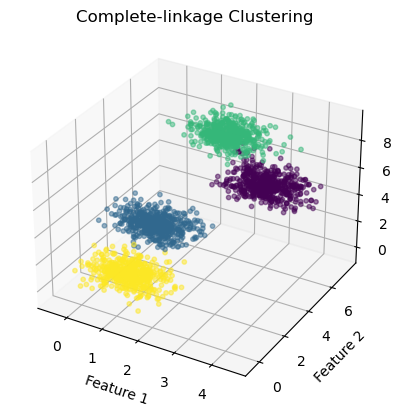

In [15]:
# Complete-linkage 层次聚类算法
complete_linkage = AgglomerativeClustering(n_clusters=len(np.unique(labels)), linkage='complete')
complete_labels = complete_linkage.fit_predict(data)
plot_clusters(data, complete_labels, "Complete-linkage Clustering")

In [17]:
def complete_linkage_clustering(data, n_clusters):
    # 初始化每个数据点为一个簇
    clusters = np.arange(len(data))
    
    while len(np.unique(clusters)) > n_clusters:
        max_distance = -1
        merge_clusters = (0, 0)

        # 寻找最大距离的两个簇
        for i in range(len(data)):
            for j in range(i+1, len(data)):
                distance = np.linalg.norm(data[i] - data[j])
                if distance > max_distance:
                    max_distance = distance
                    merge_clusters = (i, j)

        # 合并最大距离的两个簇
        clusters[clusters == merge_clusters[1]] = merge_clusters[0]

    return clusters

In [18]:
# 进行 Complete-linkage 聚类
n_clusters = 3
result = complete_linkage_clustering(data,n_clusters)

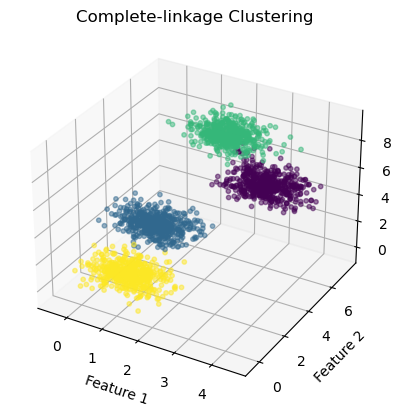

In [19]:
plot_clusters(data, result, "Complete-linkage Clustering")

平均距离

对两类的所有样本点之间的距离取平均，作为类间距离

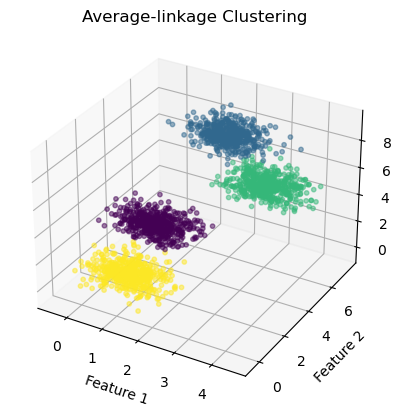

In [20]:
# Average-linkage 层次聚类算法
average_linkage = AgglomerativeClustering(n_clusters=len(np.unique(labels)), linkage='average')
average_labels = average_linkage.fit_predict(data)
plot_clusters(data, average_labels, "Average-linkage Clustering")

In [25]:
def average_linkage_clustering(data, n_clusters):
    # 初始化每个数据点为一个簇
    clusters = np.arange(len(data))
    
    while len(np.unique(clusters)) > n_clusters:
        min_avg_distance = float('inf')
        merge_clusters = (0, 0)

        # 寻找平均距离最小的两个簇
        for i in range(len(data)):
            for j in range(i+1, len(data)):
                distances_i = np.linalg.norm(data[i] - data[clusters == i], axis=1)
                distances_j = np.linalg.norm(data[j] - data[clusters == j], axis=1)

                avg_distance = (np.sum(distances_i) + np.sum(distances_j)) / (len(distances_i) + len(distances_j))
                
                if avg_distance < min_avg_distance:
                    min_avg_distance = avg_distance
                    merge_clusters = (i, j)

        # 合并平均距离最小的两个簇
        clusters[clusters == merge_clusters[1]] = merge_clusters[0]

    return clusters

In [26]:
# Average-linkage 层次聚类算法
n_clusters = 3
result = average_linkage_clustering(data,n_clusters)

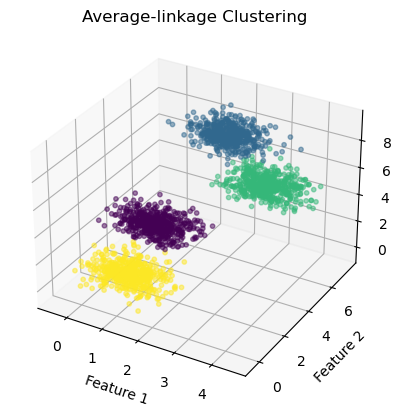

In [27]:
plot_clusters(data, result, "Average-linkage Clustering")

#### Single-Linkage (单链接) 层次聚类算法：

思想： 这种算法的核心思想是，将两个簇之间的最小距离作为这两个簇之间的距离。也就是说，对于两个簇中的任意两个样本，计算它们之间的距离，然后将最小距离作为两个簇的距离。

特点： 由于采用最小距离，单链接算法对异常值敏感。簇的形状可能会被拉长，因为只有一个小的距离会影响整个簇的连接。

优点：
对于非凸形状、簇间距离较大的情况下效果较好。

缺点：
对噪声和异常值敏感，容易受到局部最小值的影响;

由于采用最小距离，可能导致簇的形状被拉长,产生链状结构。

#### Complete-Linkage (完全链接) 层次聚类算法：

思想： 使用两个簇中最大距离作为这两个簇之间的距离。对于两个簇中的任意两个样本，计算它们之间的距离，然后将最大距离作为两个簇的距离。

特点： 完全链接算法对异常值不太敏感，形成的簇更加紧凑。然而，可能会因为最大距离的影响而导致一些离群点被误判。

优点：

对异常值不太敏感，形成的簇相对更加紧凑;

能够较好地处理凸形状的簇。

缺点：

对于噪声和异常值的存在仍然较为敏感

#### Average-Linkage (平均链接) 层次聚类算法：

思想： 平均链接算法计算两个簇中所有样本之间的平均距离，并将其作为两个簇之间的距离。即对于两个簇中的任意两个样本，计算它们之间的距离，然后取所有距离的平均值。

特点： 平均链接算法在一定程度上综合了单链接和完全链接的优点，相对于单链接对异常值更加鲁棒，同时相对于完全链接更能保持簇的结构。

优点：

在一定程度上综合了单链接和完全链接的优点，相对于单链接更鲁棒，相对于完全链接更能保持簇的结构;

对于各种形状的簇都有较好的适应性。

缺点：

计算复杂度较高

ARI（Adjusted Rand Index，调整兰德指数）是一种用于衡量两个数据分区之间相似度的聚类评估指标。它是Rand Index（兰德指数）的一种修正形式，旨在解决Rand Index对于纯度较高的分区的偏向性。

ARI的取值范围在[-1, 1]之间，其中1表示两个分区完全一致，0表示两个分区之间的相似度与随机分区相当，而-1表示两个分区完全不一致。值越接近1，表示两个分区越相似；越接近-1表示两个分区越不相似

ARI（调整兰德指数）的计算涉及到四个基本概念：a（同簇内相对位置对数）、b（异簇内相对位置对数）、c（同簇内不相对位置对数）、d（异簇内不相对位置对数）。

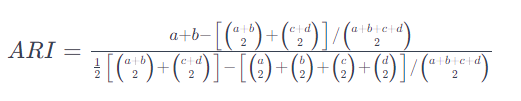

其中，（n k）表示从n个元素中选择k个的组合数。

具体步骤如下：

统计同簇内相对位置对数 a：同一真实簇内，同一聚类簇内，样本对的数量。

统计异簇内相对位置对数 b：不同真实簇内，不同聚类簇内，样本对的数量。

统计同簇内不相对位置对数 c：同一真实簇内，不同聚类簇内，样本对的数量。

统计异簇内不相对位置对数 d：不同真实簇内，同一聚类簇内，样本对的数量。

In [28]:
# 计算 ARI
ari_single = adjusted_rand_score(labels, single_labels)
ari_complete = adjusted_rand_score(labels, complete_labels)
ari_average = adjusted_rand_score(labels, average_labels)

# 打印 ARI 结果
print("ARI for Single-linkage:", ari_single)
print("ARI for Complete-linkage:", ari_complete)
print("ARI for Average-linkage:", ari_average)

ARI for Single-linkage: 0.4991262838267789
ARI for Complete-linkage: 0.9854094030308562
ARI for Average-linkage: 0.9946800729485314


In [29]:
# 定义聚类算法和聚类个数范围
cluster_algorithms = ['single', 'complete', 'average']
n_clusters_range = range(2, 6)


轮廓系数（Silhouette Coefficient）是一种用于评估聚类质量的指标，它综合了簇内样本的紧密度和簇间样本的分离度。轮廓系数的取值范围在[-1, 1]之间，其中：

1 表示簇内样本的紧密度高且簇间样本的分离度好，说明聚类结果非常好。

0 表示簇内样本的紧密度和簇间样本的分离度相当，说明聚类结果一般。

-1 表示簇内样本的紧密度低，簇间样本的分离度差，说明聚类结果较差。

轮廓系数的计算步骤如下：

对于每个样本，计算它与同簇内所有其他点的平均距离，记为 a（簇内紧密度）。

对于每个样本，计算它与最近簇（不包括所在簇）中所有点的平均距离，记为 b（簇间分离度）。

对于每个样本，轮廓系数 s 的计算公式为：s=(b-a)/max(a,b)

最后，对所有样本的轮廓系数取平均，得到整个数据集的轮廓系数。

横轴是聚类个数，纵轴是轮廓系数。通过观察曲线，可以了解到在不同聚类簇个数下，不同链接方式的聚类算法的性能。曲线越高，表示算法在对应聚类个数下的性能越好。

Silhouette Score for single-linkage with 2 clusters: 0.6530953293723046
Silhouette Score for single-linkage with 3 clusters: 0.335375716250481
Silhouette Score for single-linkage with 4 clusters: 0.2774754417021129
Silhouette Score for single-linkage with 5 clusters: 0.2762371776822935
Silhouette Score for complete-linkage with 2 clusters: 0.6530953293723046
Silhouette Score for complete-linkage with 3 clusters: 0.6251287212637399
Silhouette Score for complete-linkage with 4 clusters: 0.6308278499794413
Silhouette Score for complete-linkage with 5 clusters: 0.4992497220729505
Silhouette Score for average-linkage with 2 clusters: 0.6530953293723046
Silhouette Score for average-linkage with 3 clusters: 0.6276432941886685
Silhouette Score for average-linkage with 4 clusters: 0.6337720856681929
Silhouette Score for average-linkage with 5 clusters: 0.5798952032765062


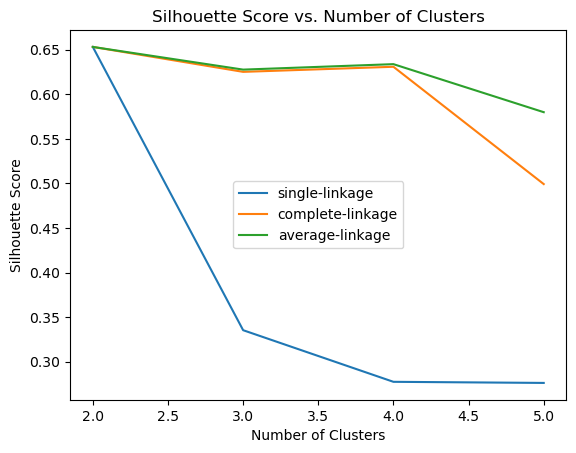

In [30]:
# 绘制轮廓系数随聚类个数变化的曲线
for algorithm in cluster_algorithms:
    silhouette_scores = []
    for n_clusters in n_clusters_range:
        
        # 使用AgglomerativeClustering进行聚类
        model = AgglomerativeClustering(n_clusters=n_clusters, linkage=algorithm)
        cal_labels = model.fit_predict(data)
        
        # 计算轮廓系数
        silhouette_avg = silhouette_score(data, cal_labels)
        silhouette_scores.append(silhouette_avg)
        
        # 输出轮廓系数
        print(f"Silhouette Score for {algorithm}-linkage with {n_clusters} clusters: {silhouette_avg}")
    
    # 绘制曲线
    plt.plot(n_clusters_range, silhouette_scores, label=f'{algorithm}-linkage')

# 添加图例和标签
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.legend()
plt.show()